**Sahil Panchasara**

**Visualizing Climate Change**

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

temp_country = pd.read_csv("../input/temperature-change/GlobalLandTemperaturesByCountry.csv",index_col='dt',parse_dates=[0])
temp_global = pd.read_csv('../input/temperature-change/GlobalTemperatures.csv')
ozone = pd.read_csv('../input/ozone-data/ozone.csv')
sea = pd.read_csv('/kaggle/input/sea-level-change/sea_levels_2015.csv')
co2 = pd.read_csv('../input/co2-ghg-emissionsdata/co2_emission.csv', parse_dates = ['Year'])
ice = pd.read_csv('../input/daily-sea-ice-extent-data/seaice.csv')
forest = pd.read_csv('../input/deforestation-and-forest-loss/annual-change-forest-area.csv')

**CO2 Emission**

World Wise

Text(0.5, 1.0, 'Average CO2 Emission (World)')

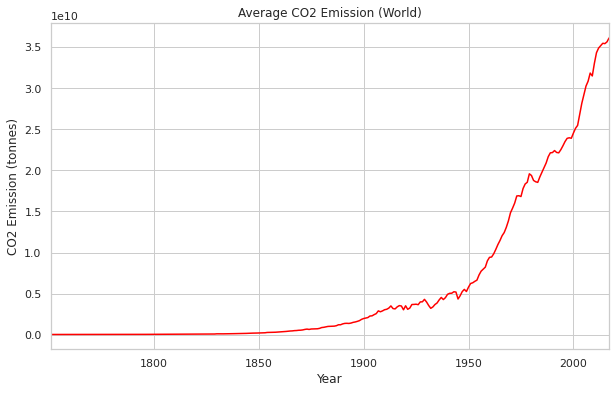

In [3]:
co2.dropna(inplace=True)

co2['Year'] = pd.to_datetime(co2['Year'])
co2['year'] = co2['Year'].map(lambda x: x.year)
co2['month'] = co2['Year'].map(lambda x: x.month)

yearmin = co2['year'].min()
yearmax = co2['year'].max()
years = range(yearmin, yearmax+1)

averageco2=[]

for year in years:
    currentyear = co2[co2['year'] == year]
    averageco2.append(currentyear[currentyear['Entity'] == 'World']['Annual CO₂ emissions (tonnes )'].mean())

sns.set(style="whitegrid")
sns.set_color_codes("pastel")
f, ax = plt.subplots(figsize=(10, 6))

plt.plot(years, averageco2, color='red')
plt.xlim(yearmin, yearmax)

ax.set_ylabel('CO2 Emission (tonnes)')
ax.set_xlabel('Year')
ax.set_title('Average CO2 Emission (World)')

Country Wise 

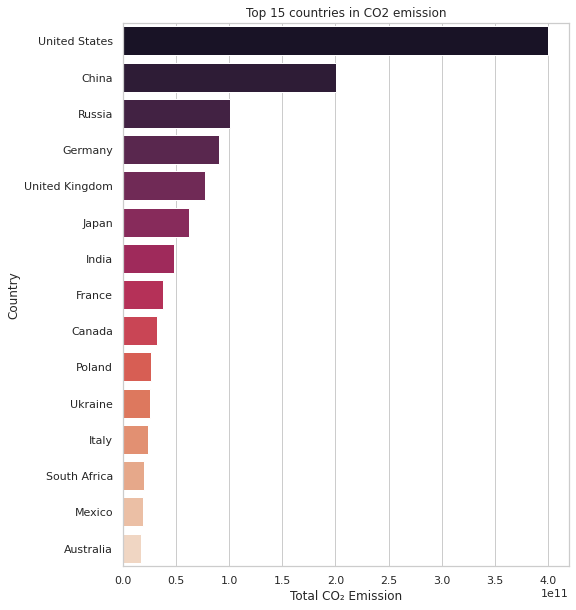

In [4]:
merge = co2.groupby(["Entity"])["Annual CO₂ emissions (tonnes )"].sum()
countrywise = pd.DataFrame(merge)

countrywise.reset_index(level=0, inplace=True)
countrywise_sorted = countrywise.sort_values('Annual CO₂ emissions (tonnes )', ascending = False)
countrywise_sorted = countrywise_sorted.iloc[1:16,:]

y1 = countrywise_sorted['Entity']
x = countrywise_sorted['Annual CO₂ emissions (tonnes )']

f, ax1 = plt.subplots(figsize=(8, 10))
sns.barplot(x=x, y=y1, palette="rocket", ax=ax1)
texts = ax1.set(xlabel="Total CO₂ Emission", ylabel="Country", title="Top 15 countries in CO2 emission")

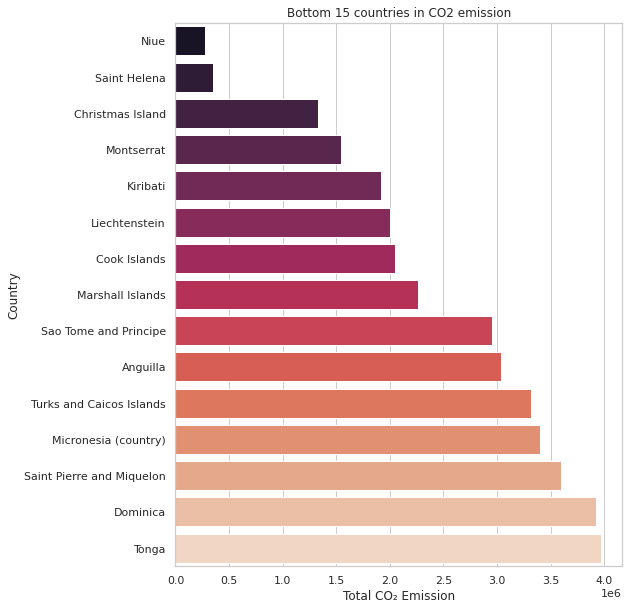

In [5]:
countrywise_sorted = countrywise.sort_values('Annual CO₂ emissions (tonnes )', ascending = True)
countrywise_sorted = countrywise_sorted.iloc[1:16,:]

y1 = countrywise_sorted['Entity']
x = countrywise_sorted['Annual CO₂ emissions (tonnes )']

f, ax1 = plt.subplots(figsize=(8, 10))
sns.barplot(x=x, y=y1, palette="rocket", ax=ax1)
texts = ax1.set(xlabel="Total CO₂ Emission", ylabel="Country", title="Bottom 15 countries in CO2 emission")

**Deforestation**

Text(0.5, 1.0, 'Net forest conversion (world)')

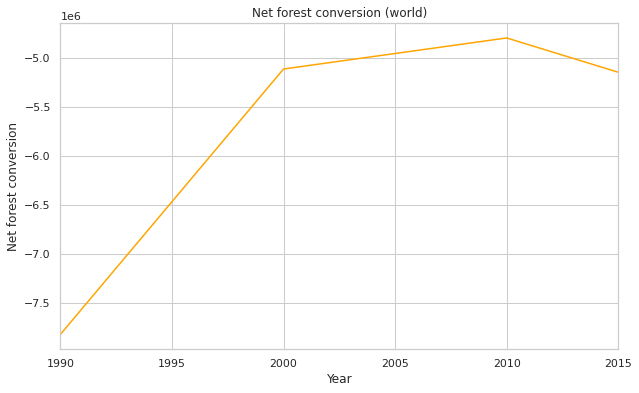

In [6]:
years = forest['Year'].unique()
net_forest_world = forest[forest['Entity'] == 'World']['Net forest conversion']

sns.set(style="whitegrid")
sns.set_color_codes("pastel")
f, ax = plt.subplots(figsize=(10, 6))

plt.plot(years, net_forest_world, color='orange')
plt.xlim(years.min(), years.max())

ax.set_ylabel('Net forest conversion')
ax.set_xlabel('Year')
ax.set_title('Net forest conversion (world)')

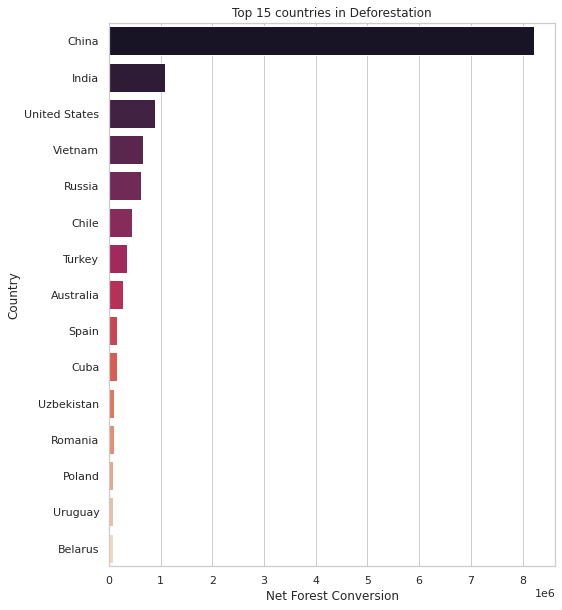

In [7]:
merge = forest.groupby(["Entity"])["Net forest conversion"].sum()
countrywise = pd.DataFrame(merge)

countrywise.reset_index(level=0, inplace=True)

countrywise_sorted = countrywise.sort_values('Net forest conversion', ascending = False)
countrywise_sorted = countrywise_sorted.iloc[0:15,:]

y1 = countrywise_sorted['Entity']
x =countrywise_sorted['Net forest conversion']

f, ax1 = plt.subplots(figsize=(8, 10))
sns.barplot(x=x, y=y1, palette="rocket", ax=ax1)
texts = ax1.set(xlabel="Net Forest Conversion", ylabel="Country", title="Top 15 countries in Deforestation")

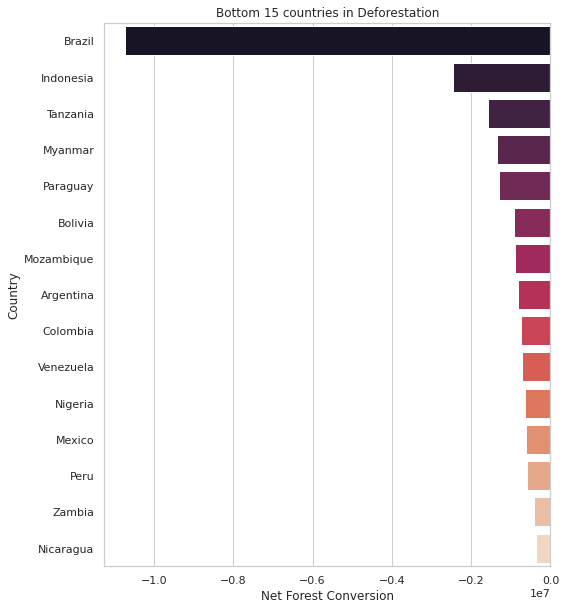

In [8]:
countrywise_sorted = countrywise.sort_values('Net forest conversion', ascending = True)
countrywise_sorted = countrywise_sorted.iloc[1:16,:]

y1 = countrywise_sorted['Entity']
x = countrywise_sorted['Net forest conversion']

f, ax1 = plt.subplots(figsize=(8, 10))
sns.barplot(x=x, y=y1, palette="rocket", ax=ax1)
texts = ax1.set(xlabel="Net Forest Conversion", ylabel="Country", title="Bottom 15 countries in Deforestation")

**Temperature Patterns**

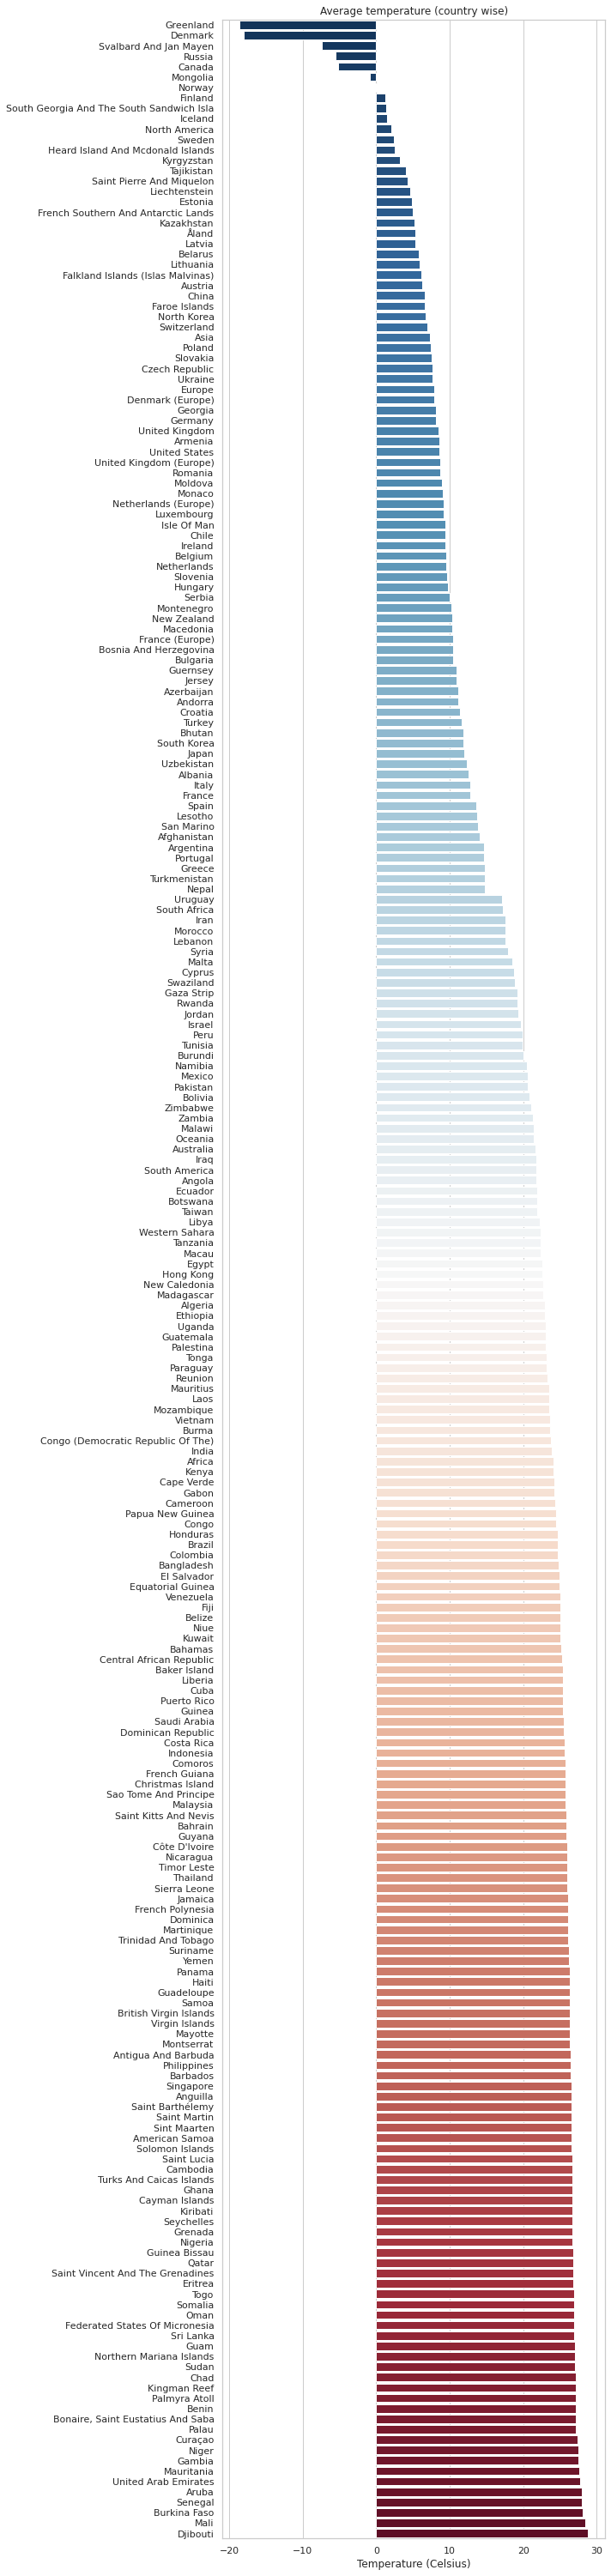

In [9]:
countries = temp_country['Country'].unique()
averagetemp = []

for country in countries:
    averagetemp.append(temp_country[temp_country['Country'] == country]['AverageTemperature'].mean())
    
rest_averagetemp = []
rest_countries = []

for i in range(len(averagetemp)):
    if not np.isnan(averagetemp[i]):
        rest_averagetemp.append(averagetemp[i])
        rest_countries.append(countries[i])
        
rest_averagetemp, rest_countries = (list(x) for x in zip(*sorted(zip(rest_averagetemp, rest_countries), key=lambda pair: pair[0])))

f, ax = plt.subplots(figsize=(8, 54))
sns.barplot(x=rest_averagetemp, y=rest_countries, palette=sns.color_palette("RdBu_r", len(rest_averagetemp)), ax=ax)

texts = ax.set(ylabel="", xlabel="Temperature (Celsius)", title="Average temperature (country wise)")

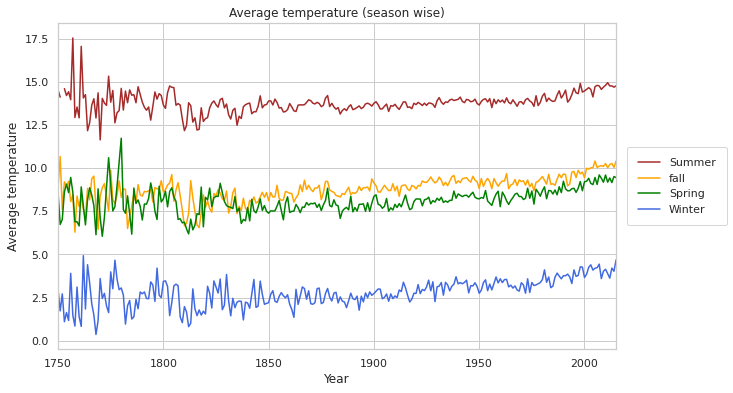

In [10]:
temp_global = temp_global[['dt', 'LandAverageTemperature']]

temp_global['dt'] = pd.to_datetime(temp_global['dt'])
temp_global['year'] = temp_global['dt'].map(lambda x: x.year)
temp_global['month'] = temp_global['dt'].map(lambda x: x.month)

def findseason(month):
    if month >= 3 and month <= 5:
        return 'spring'
    elif month >= 6 and month <= 8:
        return 'summer'
    elif month >= 9 and month <= 11:
        return 'fall'
    else:
        return 'winter'

yearmin = temp_global['year'].min()
yearmax = temp_global['year'].max()
years = range(yearmin, yearmax +1)

temp_global['season'] = temp_global['month'].apply(findseason)

springtemp = []
summertemp = []
falltemp = []
wintertemp = []

for year in years:
    currentyeardata = temp_global[temp_global['year'] == year]
    springtemp.append(currentyeardata[currentyeardata['season'] == 'spring']['LandAverageTemperature'].mean())
    summertemp.append(currentyeardata[currentyeardata['season'] == 'summer']['LandAverageTemperature'].mean())
    falltemp.append(currentyeardata[currentyeardata['season'] == 'fall']['LandAverageTemperature'].mean())
    wintertemp.append(currentyeardata[currentyeardata['season'] == 'winter']['LandAverageTemperature'].mean())

sns.set(style="whitegrid")
sns.set_color_codes("pastel")
f, ax = plt.subplots(figsize=(10, 6))

plt.plot(years, summertemp, label='Summer', color='brown')
plt.plot(years, falltemp, label='fall', color='orange')
plt.plot(years, springtemp, label='Spring', color='green')
plt.plot(years, wintertemp, label='Winter', color='royalblue')

plt.xlim(yearmin, yearmax)

ax.set_ylabel('Average temperature')
ax.set_xlabel('Year')
ax.set_title('Average temperature (season wise)')
legend = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=True, borderpad=1, borderaxespad=1)

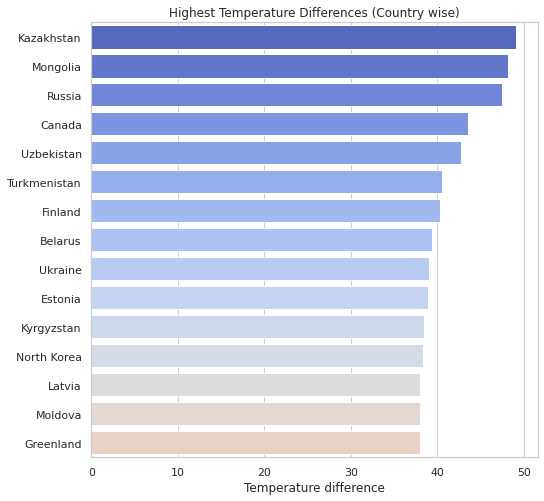

In [11]:
max_min_list = []

for country in countries:
    currenttemp_global = temp_country[temp_country['Country'] == country]['AverageTemperature']
    max_min_list.append((currenttemp_global.max(), currenttemp_global.min()))
    

rest_max_min_list = []
rest_countries = []

for i in range(len(max_min_list)):
    if not np.isnan(max_min_list[i][0]):
        rest_max_min_list.append(max_min_list[i])
        rest_countries.append(countries[i])

differences = []

for tpl in rest_max_min_list:
    differences.append(tpl[0] - tpl[1])
    
differences, rest_countries = (list(x) for x in zip(*sorted(zip(differences, rest_countries), key=lambda pair: pair[0], reverse=True)))

f, ax = plt.subplots(figsize=(8, 8))
sns.barplot(x=differences[:15], y=rest_countries[:15], palette=sns.color_palette("coolwarm", 25), ax=ax)

texts = ax.set(ylabel="", xlabel="Temperature difference", title="Highest Temperature Differences (Country wise)")

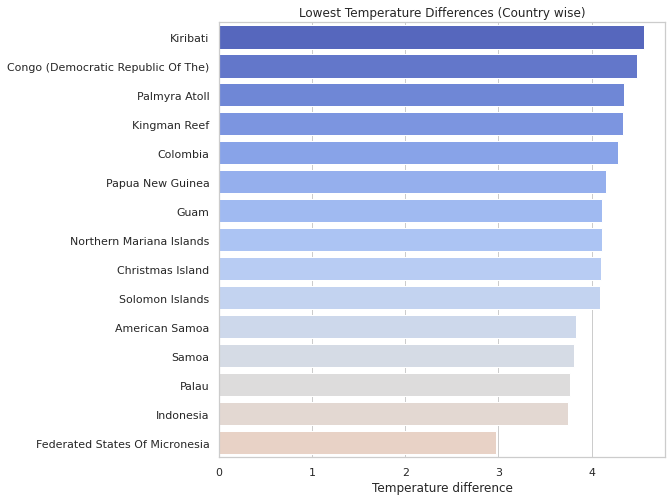

In [12]:
f,ax = plt.subplots(figsize=(8, 8))
sns.barplot(x=differences[len(differences)-15:], y=rest_countries[len(rest_countries)-15:], palette=sns.color_palette("coolwarm", 25), ax=ax)

texts = ax.set(ylabel="", xlabel="Temperature difference", title="Lowest Temperature Differences (Country wise)")

**Ozone**

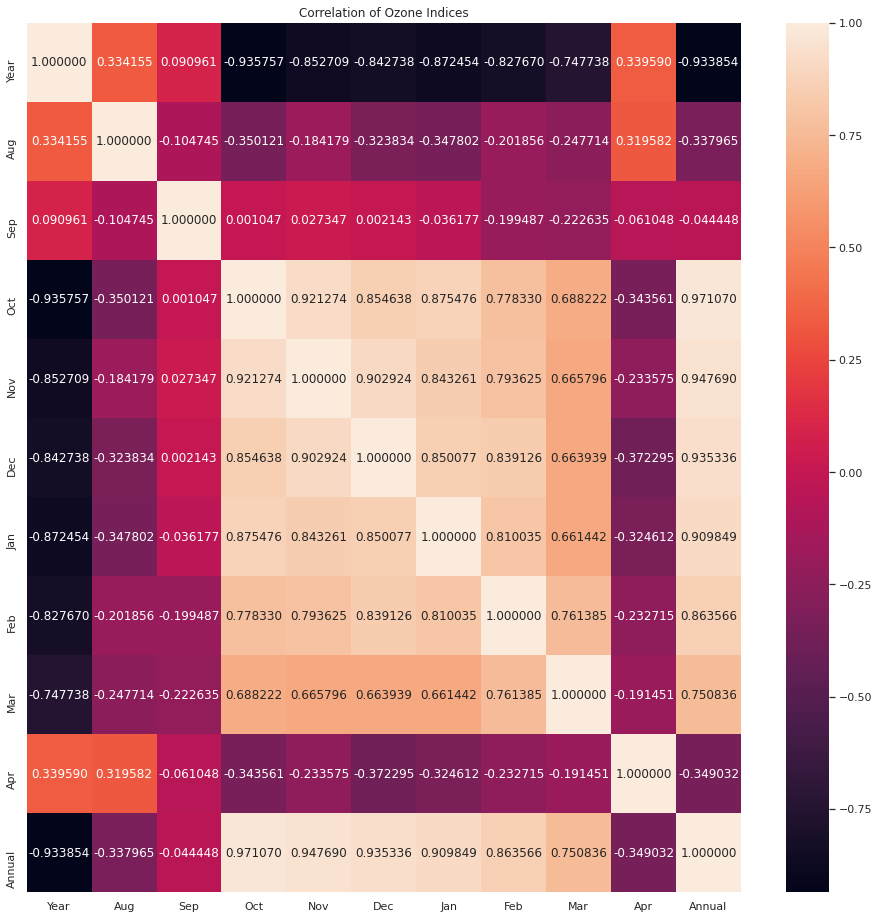

In [13]:
ozo = ozone.drop(['Unnamed: 0'], axis=1)

plt.subplots(figsize=(16,16))
sns.heatmap(ozo.corr(),annot = True,fmt="f").set_title("Correlation of Ozone Indices")
plt.show()

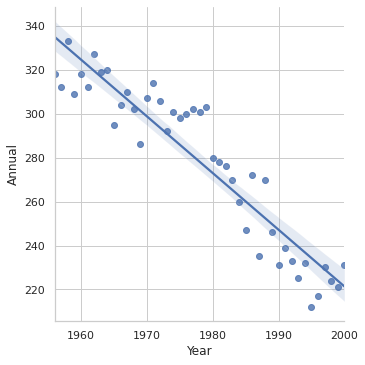

In [14]:
sns.lmplot(x="Year", y="Annual", data=ozone)

<AxesSubplot:>

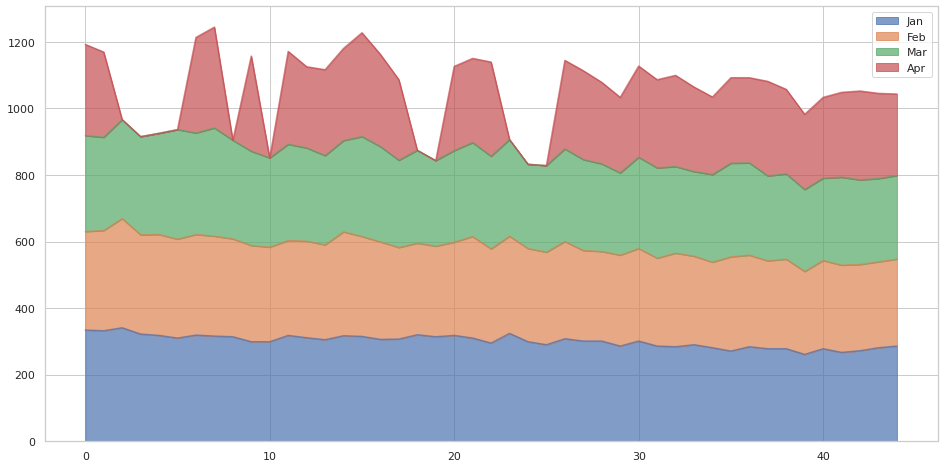

In [15]:
ozone.plot.area(y=['Jan','Feb','Mar','Apr'],alpha=0.7,figsize=(16,8))

**Sea Level**

Text(0.5, 1.0, 'Sea Level Height')

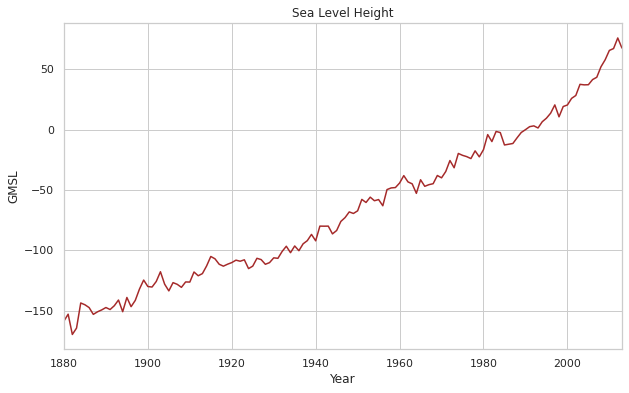

In [16]:
sea = sea[['Time', 'GMSL']]

sea['Time'] = pd.to_datetime(sea['Time'])
sea['year'] = sea['Time'].map(lambda x: x.year)
sea['month'] = sea['Time'].map(lambda x: x.month)

sea_yearmin = sea['year'].min()
sea_yearmax = sea['year'].max()
sea_years = range(sea_yearmin, sea_yearmax +1)

sea_level=[]

for year in sea_years:
    currentyeardata = sea[sea['year'] == year]
    sea_level.append(currentyeardata['GMSL'].mean())    
    
sns.set(style="whitegrid")
sns.set_color_codes("pastel")
f, ax = plt.subplots(figsize=(10, 6))

plt.plot(sea_years,sea_level, color='brown')

plt.xlim(sea_yearmin, sea_yearmax)
ax.set_ylabel('GMSL')
ax.set_xlabel('Year')
ax.set_title('Sea Level Height')

**Sea Ice Extent**

Text(0.5, 1.0, 'Sea Ice Extent (North Hemisphere)')

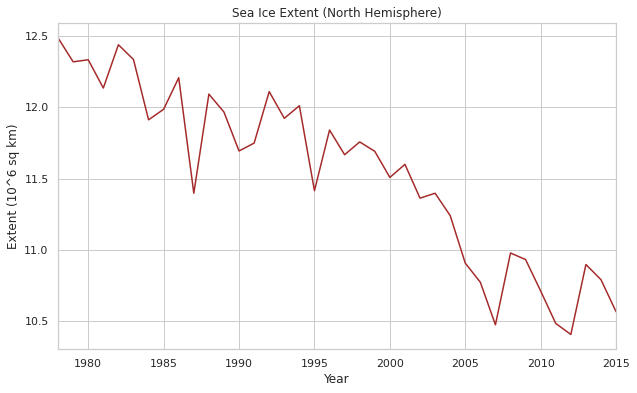

In [17]:
ice.drop([' Day','    Missing',' Source Data'], axis = 1)

# get northern hemisphere data
ice_north = ice[ice.hemisphere =='north']
yearmin = ice_north['Year'].min()
yearmax = yearmax
years = range(yearmin, yearmax+1)
averageextent=[]
for year in years:
    currentyeardata = ice_north[ice_north['Year'] == year]
    averageextent.append(currentyeardata['     Extent'].mean())


sns.set(style="whitegrid")
sns.set_color_codes("pastel")
f, ax = plt.subplots(figsize=(10, 6))

plt.plot(years,averageextent, color='brown')

plt.xlim(yearmin,yearmax)

ax.set_ylabel('Extent (10^6 sq km)')
ax.set_xlabel('Year')
ax.set_title('Sea Ice Extent (North Hemisphere)')


Text(0.5, 1.0, 'Sea Ice Extent (South Hemisphere)')

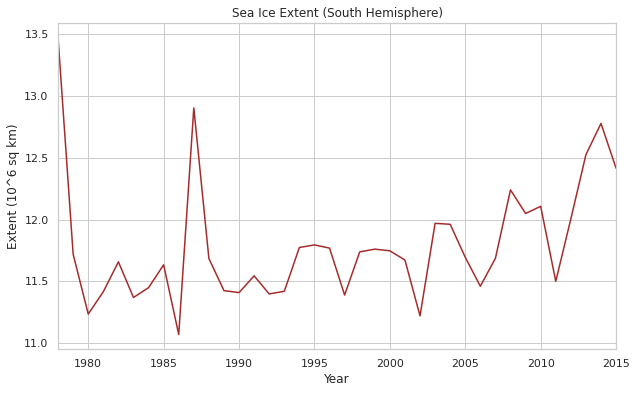

In [18]:
# get southern hemisphere data
ice_south = ice[ice.hemisphere =='south']
yearmin = ice_south['Year'].min()
years = range(yearmin, yearmax+1)
averageextent=[]
for year in years:
    currentyeardata = ice_south[ice_south['Year'] == year]
    averageextent.append(currentyeardata['     Extent'].mean())
    
sns.set(style="whitegrid")
sns.set_color_codes("pastel")
f, ax = plt.subplots(figsize=(10, 6))

plt.plot(years,averageextent, color='brown')

plt.xlim(yearmin,yearmax)

ax.set_ylabel('Extent (10^6 sq km)')
ax.set_xlabel('Year')
ax.set_title('Sea Ice Extent (South Hemisphere)')